# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

### Data

## Spambase

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The classification task for this dataset is to determine whether a given email is spam or not.
	
Our collection of spam e-mails came from our postmaster and individuals who had filed spam.  Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam.  These are useful when constructing a personalized spam filter.  One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.


### Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [16]:
with open('../Datasets/spambase/spambase.columns', 'r') as file:
    column_names = file.read().splitlines()
    
df = pd.read_csv("../Datasets/spambase/spambase.data")
df.columns = column_names
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [10]:
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [11]:
df = df.dropna()

## Train | Test Split

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('is_spam', axis=1)
y = df['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Classifier

### Default Hyperparameters

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
base_pred = model.predict(X_test)

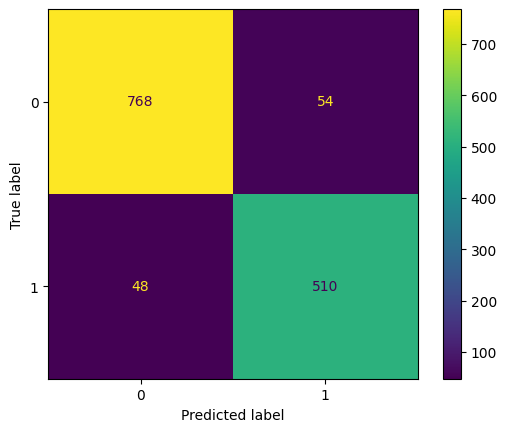

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

# Assuming 'model' is your trained classifier and X_test, y_test are your test datasets.
# First, you need to predict the test set outcomes.
y_pred = model.predict(X_test)

# Now, compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Then, create the display object for the confusion matrix.
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Finally, use the display object to plot the matrix.
cmd.plot()
plt.show()  # This line is to make sure the plot is displayed in some environments.

In [25]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       822
           1       0.90      0.91      0.91       558

    accuracy                           0.93      1380
   macro avg       0.92      0.92      0.92      1380
weighted avg       0.93      0.93      0.93      1380



In [26]:
model.feature_importances_

array([3.50651155e-03, 4.35590683e-03, 5.71124232e-03, 2.26389834e-03,
       1.12623309e-02, 4.29296193e-03, 1.51842261e-01, 4.59383068e-03,
       3.93613194e-03, 7.11938771e-03, 3.55226991e-03, 1.33481187e-02,
       3.45003548e-03, 8.91969994e-04, 1.21467755e-03, 3.08644541e-02,
       6.44419879e-03, 4.40187571e-03, 1.34065106e-02, 5.26448026e-03,
       1.94381717e-02, 3.63738660e-03, 0.00000000e+00, 2.15782816e-02,
       6.79965287e-02, 2.88184532e-03, 1.02854142e-02, 2.46597746e-03,
       1.24433886e-03, 3.62586549e-03, 1.25224358e-03, 0.00000000e+00,
       1.63828288e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.29301434e-04, 0.00000000e+00, 1.42611035e-03, 1.70880010e-03,
       0.00000000e+00, 4.04446175e-03, 6.03455605e-04, 0.00000000e+00,
       8.97489582e-03, 2.73531153e-02, 0.00000000e+00, 4.20900021e-03,
       2.77963357e-03, 4.61003653e-03, 0.00000000e+00, 1.07966524e-01,
       3.23516688e-01, 2.38331632e-04, 2.17110654e-02, 3.60161014e-02,
      

In [28]:
pd.DataFrame(index=df.drop('is_spam', axis=1).columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
word_freq_make,0.003507
word_freq_address,0.004356
word_freq_all,0.005711
word_freq_3d,0.002264
word_freq_our,0.011262
word_freq_over,0.004293
word_freq_remove,0.151842
word_freq_internet,0.004594
word_freq_order,0.003936
word_freq_mail,0.007119


In [30]:
from sklearn.tree import plot_tree

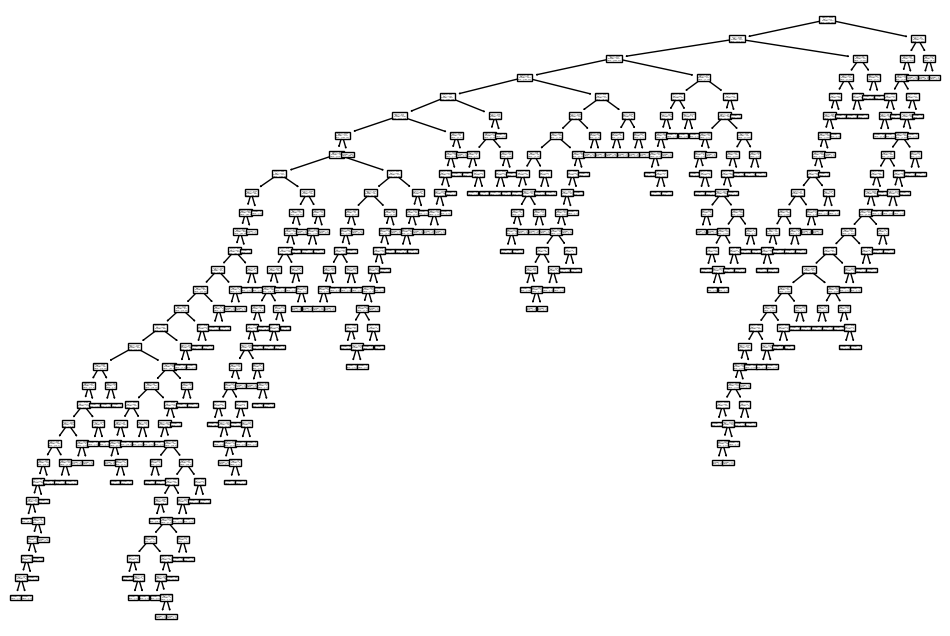

In [31]:
plt.figure(figsize=(12,8))
plot_tree(model);

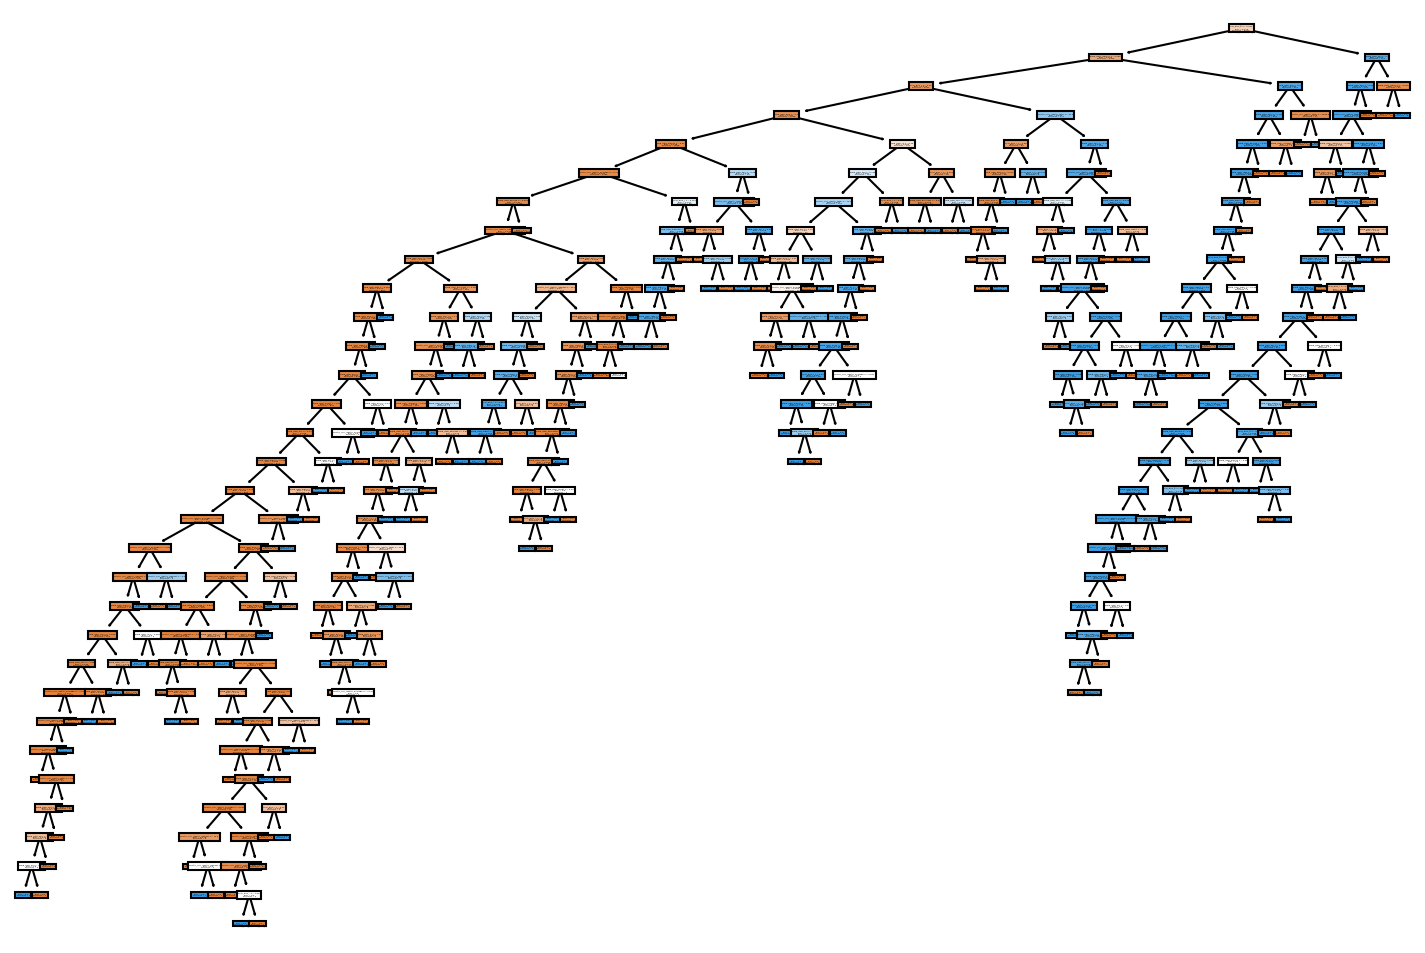

In [33]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=df.drop('is_spam', axis=1).columns,);

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [41]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=df.drop('is_spam', axis=1).columns,);

## Understanding Hyperparameters

### Max Depth

In [42]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [43]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       822
           1       0.94      0.74      0.83       558

    accuracy                           0.88      1380
   macro avg       0.89      0.85      0.87      1380
weighted avg       0.88      0.88      0.87      1380





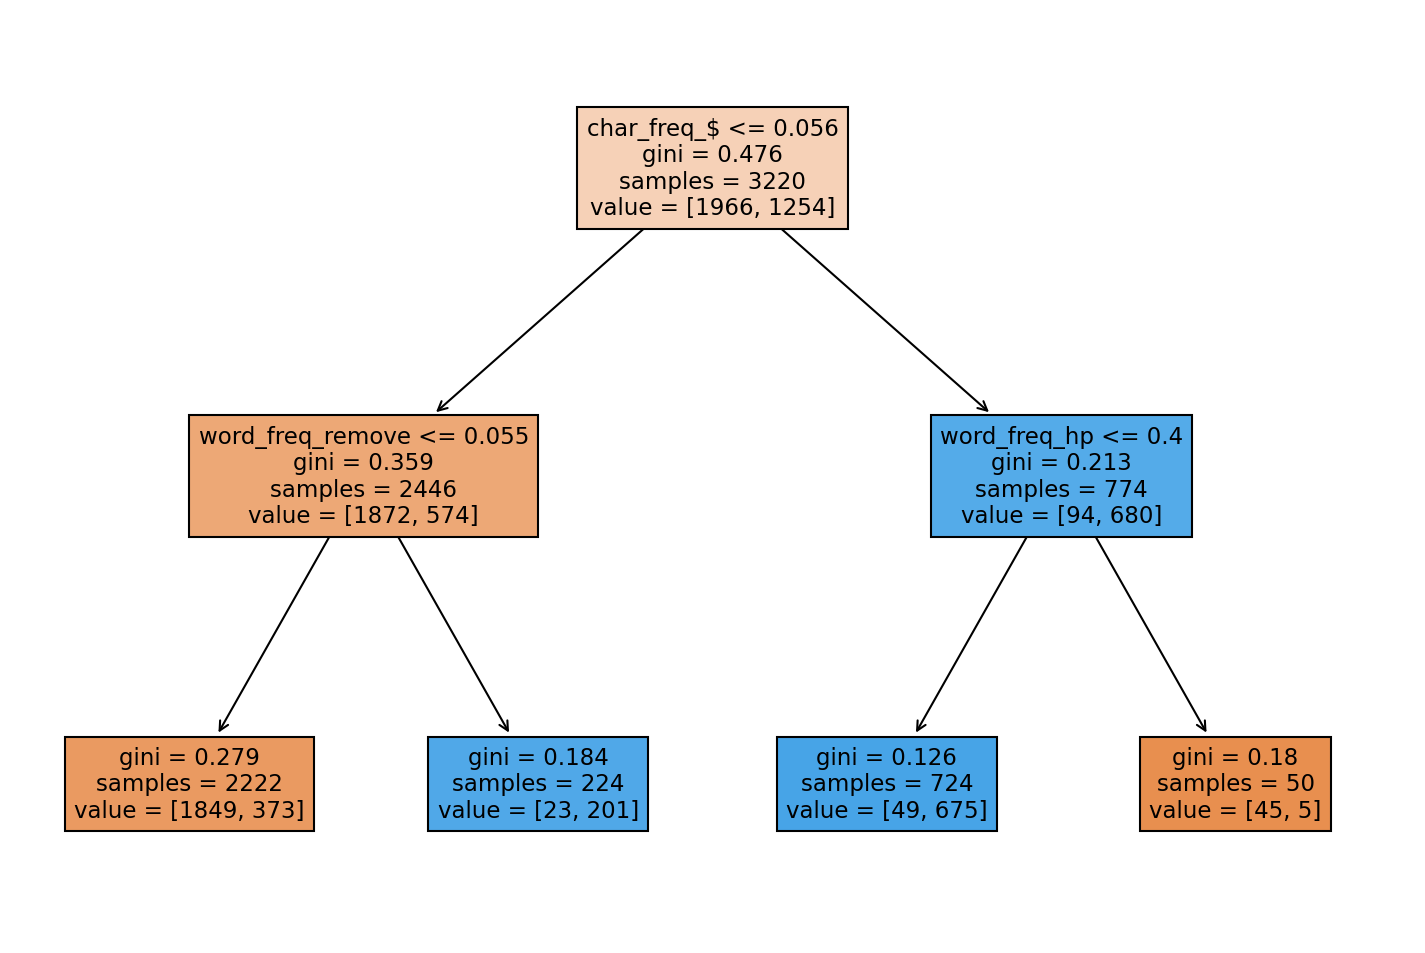

In [44]:
report_model(pruned_tree)

In [45]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       822
           1       0.90      0.75      0.82       558

    accuracy                           0.86      1380
   macro avg       0.87      0.84      0.85      1380
weighted avg       0.87      0.86      0.86      1380





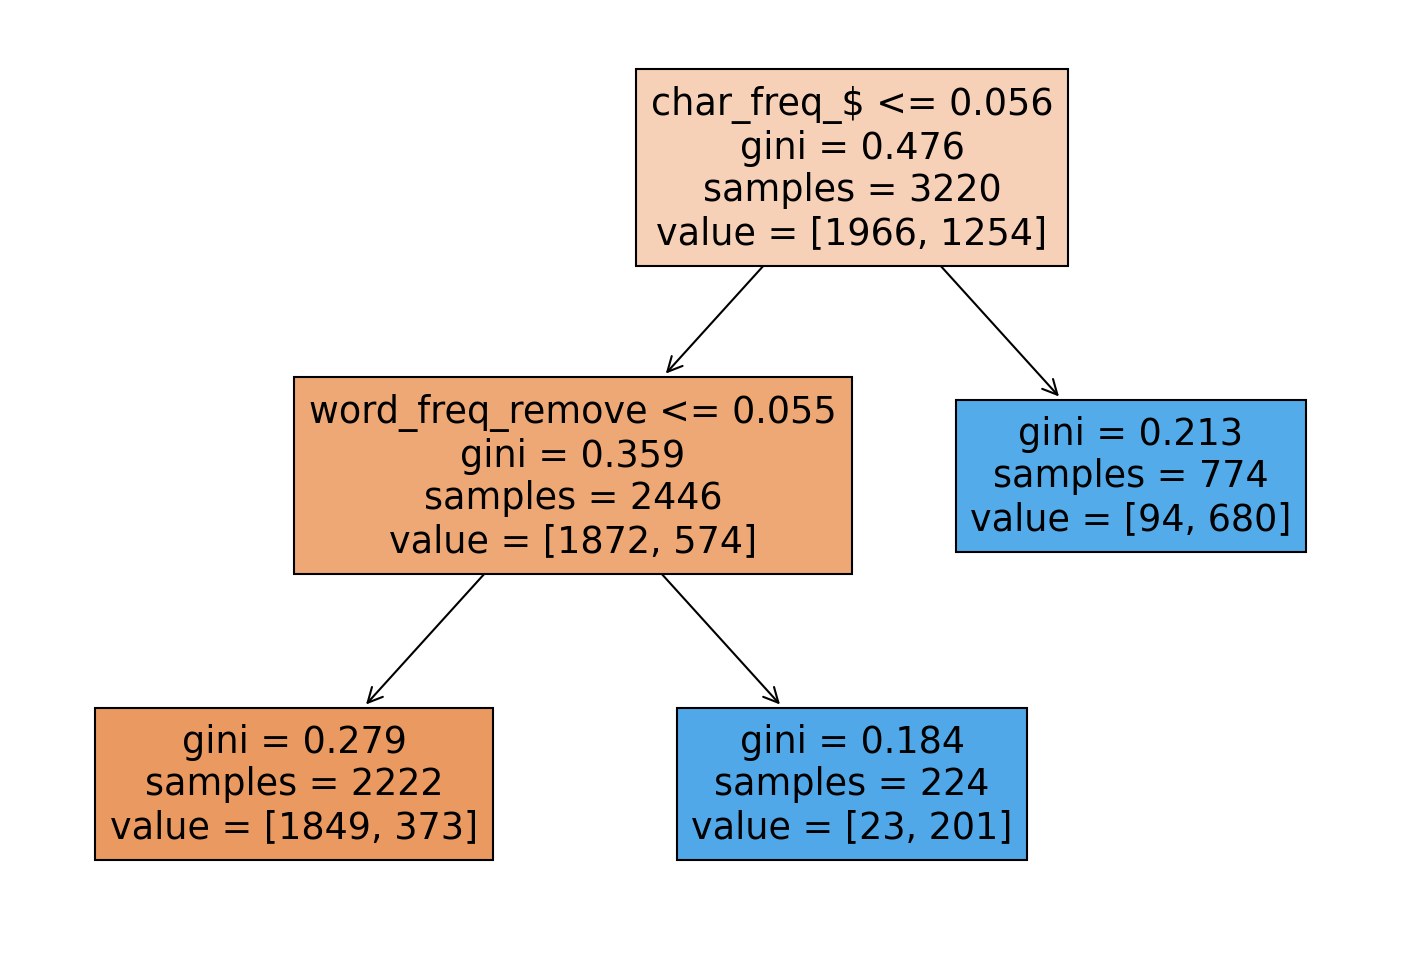

In [46]:
report_model(pruned_tree)

In [47]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       822
           1       0.90      0.90      0.90       558

    accuracy                           0.92      1380
   macro avg       0.92      0.92      0.92      1380
weighted avg       0.92      0.92      0.92      1380





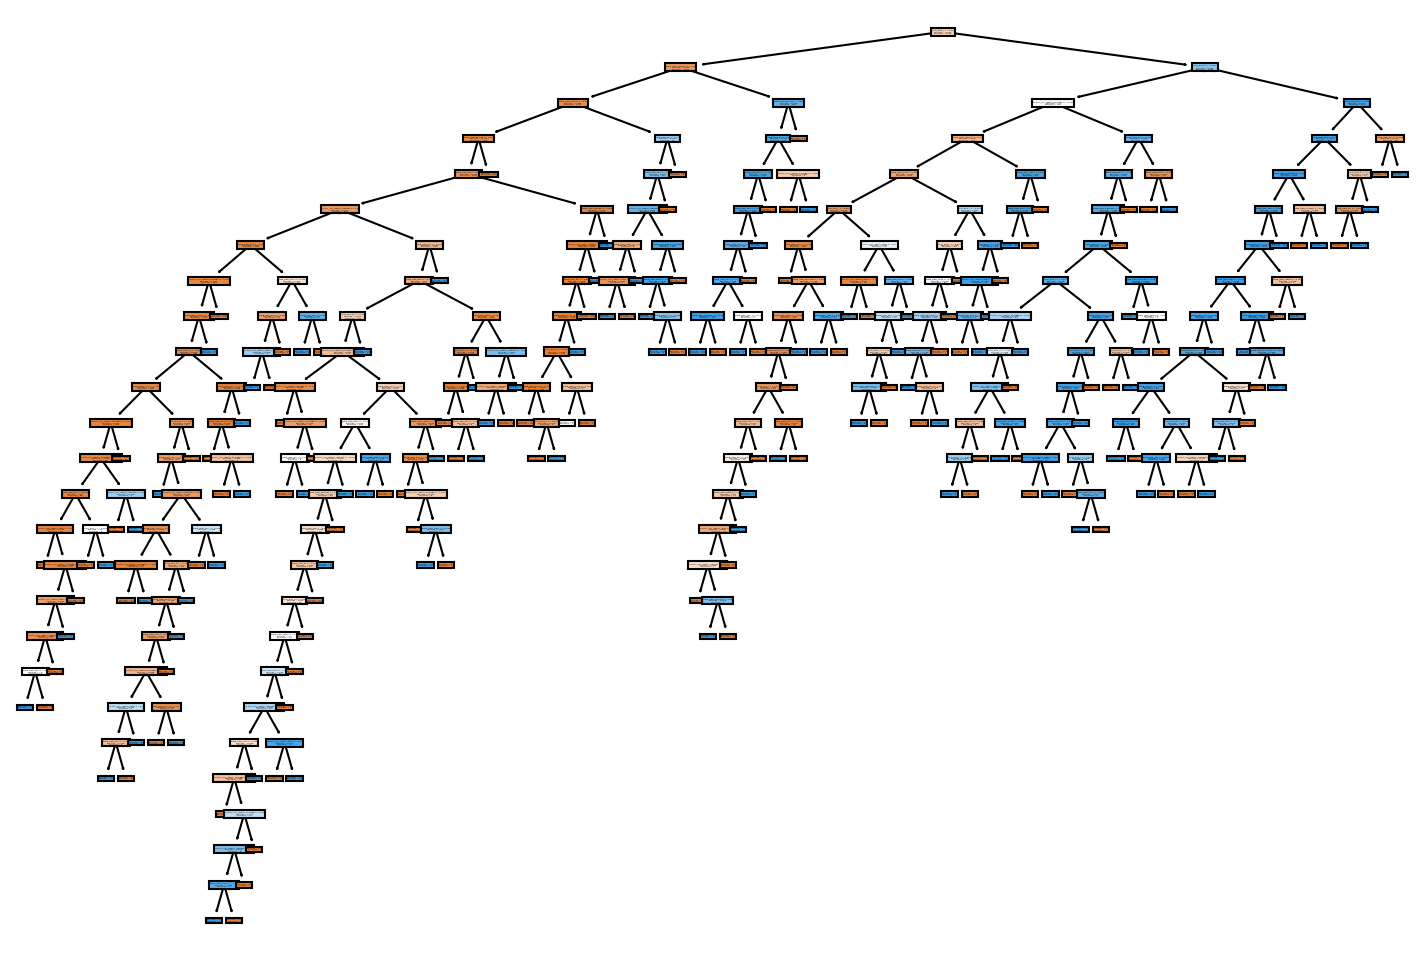

In [48]:
report_model(entropy_tree)